## STEP-4 (Introduction Image augmentation)
    Target:

        -- To increase accuracy we want the model to train on more difficult data. So we are introducing image augmentation in this step

    Results:

        -- Parameters: 7,330
        -- Best Training Accuracy: 98.94
        -- Best Test Accuracy: 99.40

    Analysis:

        -- The accuracy has improved a little compared to previous step (from 99.36 to 99.40)
        -- The training accuracy is increasing but test accuracy is fluctuating a little. The model is not able to find the minima. So, we need to introduce learning rate schedular so that learning rate reduces with epochs and does not overshoot


# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd 'drive/MyDrive/ERA_V1/Session_7_InDepth_Coding_Practice'

/content/drive/MyDrive/ERA_V1/Session_7_InDepth_Coding_Practice


In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Data Transformations



In [4]:
from data_transformers import TransformsWithAugmentation
transforms_obj = TransformsWithAugmentation()
train = transforms_obj.download_train_data()
test = transforms_obj.download_test_data()

# Train Test Dataloaders




In [5]:
from train_test_loaders import Train_Test_Dataloaders
train_test_dataloaders_obj = Train_Test_Dataloaders()

train_loader = train_test_dataloaders_obj.get_train_dataloader(train)
test_loader = train_test_dataloaders_obj.get_test_dataloader(test)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# The Model

$$n_{out} = \lfloor \frac{n_{in} + 2p - k}{s} \rfloor + 1$$

$$j_{out} = j{_in}*s$$

$$r_{out} = r_{in} + (k-1)*j_{in}$$


**n_in:** number of input features

**n_out:** number of output features

**k:** kernel_size

**s:** stride

**p:** padding

**j_in:** jump in

**j_out:** jump out

**r_in:** in receptive field

**r_out:** out receptive field

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda


In [7]:
from models import Model3
model = Model3().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 12, 22, 22]           1,080
             ReLU-10           [-1, 12, 22, 22]               0
      BatchNorm2d-11           [-1, 12, 22, 22]              24
          Dropout-12           [-1, 12, 22, 22]               0
           Conv2d-13           [-1, 14, 20, 20]           1,512
             ReLU-14           [-1, 14,

# Let's Train and test our model

In [8]:
from train_test import Train_Test
train_test_obj = Train_Test()

train_losses, test_losses, train_acc, test_acc = train_test_obj.train_and_test_model(model, device, 15, train_loader, test_loader)

EPOCH: 0


loss=0.1271345168352127 Batch_id=468 Accuracy=90.91: 100%|██████████| 469/469 [00:32<00:00, 14.52it/s]



 Test set: Average loss: 0.0834, Accuracy: 9765/10000 (97.65%)

EPOCH: 1


loss=0.08824183791875839 Batch_id=468 Accuracy=97.56: 100%|██████████| 469/469 [00:26<00:00, 17.42it/s]



 Test set: Average loss: 0.0523, Accuracy: 9853/10000 (98.53%)

EPOCH: 2


loss=0.03847059607505798 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:29<00:00, 15.81it/s]



 Test set: Average loss: 0.0453, Accuracy: 9863/10000 (98.63%)

EPOCH: 3


loss=0.04470762237906456 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:27<00:00, 17.12it/s]



 Test set: Average loss: 0.0352, Accuracy: 9903/10000 (99.03%)

EPOCH: 4


loss=0.009884324856102467 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:27<00:00, 17.18it/s]



 Test set: Average loss: 0.0316, Accuracy: 9917/10000 (99.17%)

EPOCH: 5


loss=0.08901134133338928 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:26<00:00, 17.38it/s]



 Test set: Average loss: 0.0304, Accuracy: 9918/10000 (99.18%)

EPOCH: 6


loss=0.028352828696370125 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:25<00:00, 18.14it/s]



 Test set: Average loss: 0.0304, Accuracy: 9912/10000 (99.12%)

EPOCH: 7


loss=0.04819178208708763 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:27<00:00, 17.26it/s]



 Test set: Average loss: 0.0258, Accuracy: 9915/10000 (99.15%)

EPOCH: 8


loss=0.0200106929987669 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:26<00:00, 17.62it/s]



 Test set: Average loss: 0.0319, Accuracy: 9900/10000 (99.00%)

EPOCH: 9


loss=0.02795666642487049 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:27<00:00, 17.16it/s]



 Test set: Average loss: 0.0253, Accuracy: 9915/10000 (99.15%)

EPOCH: 10


loss=0.025643428787589073 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:27<00:00, 17.29it/s]



 Test set: Average loss: 0.0216, Accuracy: 9933/10000 (99.33%)

EPOCH: 11


loss=0.028989063575863838 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:27<00:00, 17.33it/s]



 Test set: Average loss: 0.0237, Accuracy: 9929/10000 (99.29%)

EPOCH: 12


loss=0.026639370247721672 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:29<00:00, 15.81it/s]



 Test set: Average loss: 0.0204, Accuracy: 9940/10000 (99.40%)

EPOCH: 13


loss=0.017895597964525223 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:27<00:00, 17.07it/s]



 Test set: Average loss: 0.0216, Accuracy: 9932/10000 (99.32%)

EPOCH: 14


loss=0.01383229810744524 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:26<00:00, 17.60it/s]



 Test set: Average loss: 0.0208, Accuracy: 9936/10000 (99.36%)



# Accuracy and Loss Visualisation

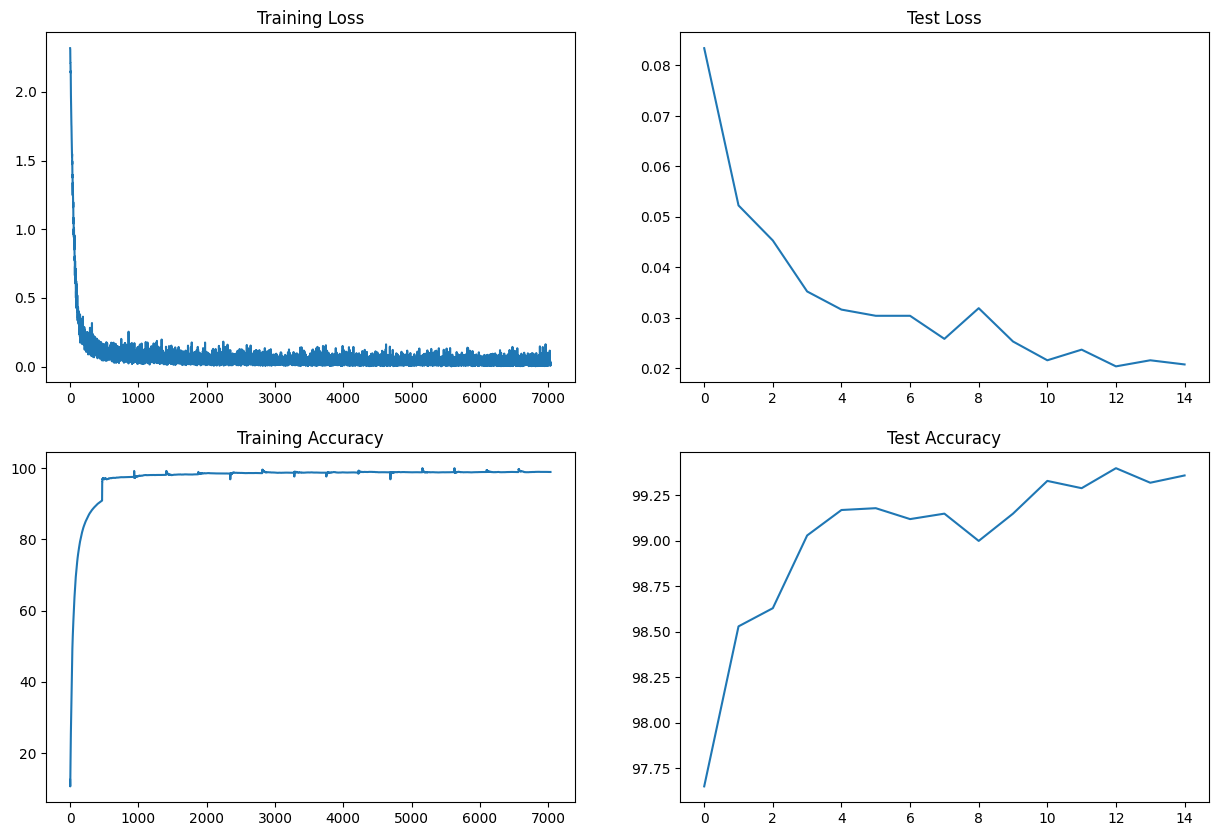

In [9]:
%matplotlib inline
from result_visualisation import Result_Visualisation
result_visualisation_obj = Result_Visualisation()
result_visualisation_obj.plot_accuracy_and_loss(train_losses, test_losses, train_acc, test_acc)